In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 


orders = pd.read_csv('Orders.csv') 
returns = pd.read_csv('Returns.csv')

In [2]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [3]:
#conversions for all the columns  
#Also problem 1 

profits = orders['Profit'].str.replace('$', '').str.replace(',','') 
orders['Profit'] = [float(x) for x in profits] 
sales = orders['Sales'].str.replace('$', '').str.replace(',','')
orders['Sales'] = [float(x) for x in sales] 
orders.columns = orders.columns.str.replace(".", "_")
orders['Order_Date'] = pd.to_datetime(orders['Order_Date']) 
orders['Ship_Date'] = pd.to_datetime(orders['Order_Date']) 

def getyear(dt):
    return dt.year
df['years'] = df['Order_Date'].apply(getyear)

returns.columns = ['Returned','Order_ID', 'Region']

orders.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-11,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-05,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-17,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-28,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-05,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


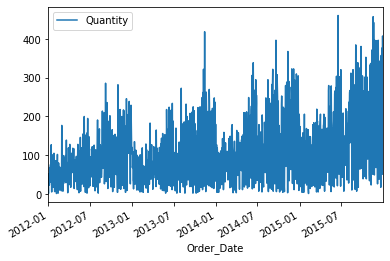

In [8]:
#problem 2 part 1 
#There seems to be a major increase in orders in the fall/winter portion of the year relative to to the spring/summer
orders.groupby('Order_Date', as_index = False).agg('sum').plot('Order_Date', 'Quantity')

In [9]:
#Problem 2 part 2 
office_supplies = orders.loc[orders.Category == 'Office Supplies'] 
furniture = orders.loc[orders.Category == 'Furniture'] 
tech = orders.loc[orders.Category == 'Technology'] 

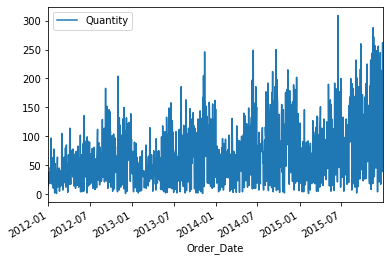

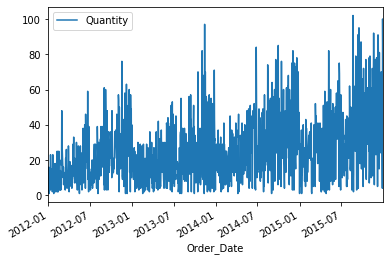

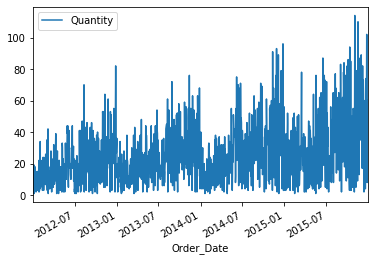

In [12]:
#plots of each category
#The same trends appear to be consistent across categories 
office_supplies.groupby('Order_Date', as_index = False).agg('sum').plot('Order_Date', 'Quantity')
furniture.groupby('Order_Date', as_index = False).agg('sum').plot('Order_Date', 'Quantity')
tech.groupby('Order_Date', as_index = False).agg('sum').plot('Order_Date', 'Quantity') 


In [16]:
df = pd.merge(orders, returns, how = 'inner', on = "Order_ID")

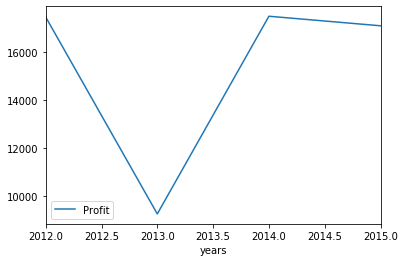

In [19]:
#Table of losses in profit by year 
#presumably if an item was returned, the profit made on the item is 0, so to determine how much was lost in profits, summed the profits column 

group = df.groupby('years', as_index=False).agg('sum') 

group.plot('years', 'Profit')


334
78


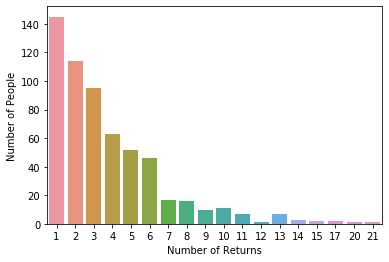

In [95]:
#Problem 3 part 1 
# 334 customers returned an item more than once 
# 78 customer returned an item more than five times 
counts = df['Customer_Name'].value_counts().value_counts().to_frame()
counts = counts.reset_index() 
counts['index'] = [int(x) for x in counts['index']] 

one_return = counts.loc[counts.index > 1]  
print(sum(one_return['Customer_Name'])) 
five_return = counts.loc[counts.index > 5]  
print(sum(five_return['Customer_Name']))

counts.columns = ['Number of Returns', 'Number of People']
sns.barplot(x="Number of Returns", y="Number of People", data=counts) 


In [73]:
#Finding the number of people who returned more than once and more than five times 
counts['index'] = [int(x) for x in counts['index']] 
one_return = counts.loc[counts.index > 1]  
print(sum(one_return['Customer_Name'])) 

five_return = counts.loc[counts.index > 5]  
print(sum(five_return['Customer_Name']))

334
78


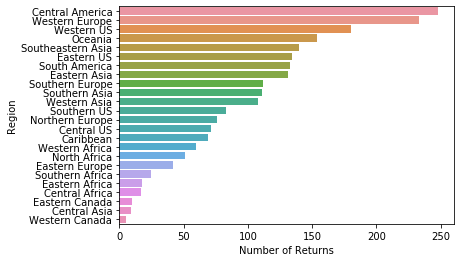

In [85]:
#Problem 3 part 3 
#Based on barplot it seems like Western Canada has the lowest number of returns 
regions = df['Region_y'].value_counts().to_frame()
regions = regions.reset_index()
regions.columns = ['Region', 'Number of Returns'] 
sns.barplot(x = 'Number of Returns',y='Region',data = regions)

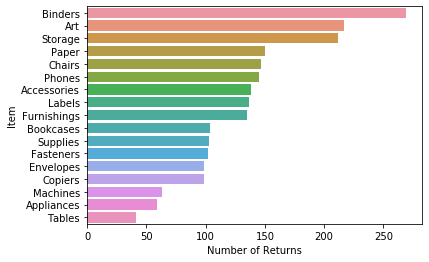

In [92]:
#Problem 3 part 4 
#Binders seem to be the most returned item among all subcategories
items = df['Sub_Category'].value_counts().to_frame()
items = items.reset_index() 
items.columns = ['Item', 'Number of Returns'] 
sns.barplot(x = 'Number of Returns',y='Item',data = items)
